<h1>Anggota Kelompok</h1>
<ul>
<li>Christopher Nathaniel Tanamas / 222200153</li>
<li>Grace Calista Lim / 222102176</li>
<li>Jemima Alithia Sigar / 222101393</li>
</ul>

<h2>Problem</h2>
<p>Narkoba (narkotika, psikotropika, dan obat terlarang) dapat memicu dampak berbahaya, baik pada kesehatan pengguna maupun pada sekitarnya. Pengklasifikasian pengguna narkoba dapat berdampak besar untuk pencegahan dan penanganan penyalahgunaan zat tersebut. Dengan dapat mengetahui para pengguna berdasarkan ciri-ciri fisik maupun perilakunya, kita dapat mencegah dampak buruk dari penggunaan zat tersebut dan segera melakukan rehabilitasi bagi para penggunanya sebelum terjadi dampak yang merugikan.</p>
<p>Dalam program ini, kami mencoba untuk mengklasifikasikan antara para pengguna narkoba yang terakhir kali menggunakan narkoba dalam seminggu terakhir dengan orang-orang yang tidak pernah mengkonsumsi narkoba. Kami memiliki narkoba jenis ganja (Cannabis) untuk menjadi bahan klasifikasi kami, karena narkoba jenis ganja cukup banyak ditemukan dan dikonsumsi oleh para pengguna narkoba di Indonesia. Untuk melakukan klasifikasi tersebut, kami menggunakan sebuah dataset yang berisikan ciri-ciri dari segi umur, gender, hingga perilaku para pengguna narkoba maupun yang tidak menggunakan narkoba. </p>

<h2>Importing Libraries</h2>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

<h2>Importing & Displaying Data</h2>

<p>Dataset ini memiliki 1884 baris data untuk mengkategorikan orang pengguna narkoba berdasarkan beberapa ciri-ciri yang ada, seperti umur, gender, dan kepribadian seseorang</p>

In [4]:
raw_df = pd.read_csv('drug_consumption.csv')    # Membaca data dari csv ke dataframe
display(raw_df.head(10))  # Menampilkan 10 data teratas untuk melihat data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
5,7,45-54,M,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,8,35-44,M,Left school at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
7,9,35-44,F,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,10,55-64,M,Masters degree,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,11,25-34,F,University degree,UK,White,-1.05308,0.80523,-1.11902,-0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL1


<h2>Data Preprocessing</h2>
<p>Data preprocessing merupakan serangkaian langkah / teknik yang diterapkan pada data mentah sebelum data tersebut dilatih menjadi model atau algoritma dalam machine learning. Tujuan dari data preprocessing adalah untuk mempersiapkan, membuang data yang tidak diperlukan, ataupun mengubah data agar sesuai dengan kebutuhan pemodelan yang akan dilakukan.</p>

<h4>1. Menghapus Beberapa Kolom yang Tidak Diperlukan</h4>
<p>Di dalam proyek ini, kami hanya memfokuskan untuk mengklasifikasi pengguna narkoba jenis Cannabis (ganja) berdasarkan beberapa ciri berikut:</p>
<ul>
<li>Age</li>
<li>Gender</li>
<li>Nscore (NEO-FFI-R Neuroticism)</li>
<li>Escore (NEO-FFI-R Extraversion)</li>
<li>Oscore (NEO-FFI-R Openness to experiences)</li>
<li>Ascore (NEO-FFI-R Agreeableness)</li>
<li>Cscore (NEO-FFI-R Conscientiousness)</li>
<li>Impulsive (Impulsiveness measured by BIS-11)</li>
<li>SS (Sensation seeking measured by ImpSS)</li>
</ul>
<p>Maka, kolom-kolom lain yang ada akan kami hapus, termasuk dengan jenis-jenis narkoba selain ganja untuk mempermudah proses pengklasifikasian kami.</p>

In [3]:
# Menghapus semua kolom yang tidak diperlukan
raw_df.drop(columns=['ID', 'Education', 'Country', 'Ethnicity', 'Alcohol', 'Amphet', 'Amyl', 
                     'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Nicotine', 'Ecstasy', 'Heroin', 
                     'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer', 'VSA'], inplace=True)
display(raw_df) # Menampilkan dataframe baru

,Age,Gender,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,25-34,M,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
1,35-44,M,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
2,18-24,F,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
3,35-44,F,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
4,65+,F,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0
...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1880,18-24,M,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL3
1881,25-34,F,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1882,18-24,F,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL6


<h4>2. Menghapus Kategori yang Tidak Perlu</h4>
<p>Di dalam dataset ini, terdapat 7 kelas pengguna narkoba berdasarkan terakhir kali pengguna tersebut menggunakan narkoba:</p>
<ul>
<li>CL0 : Tidak pernah menggunakan </li>
<li>CL1 : Digunakan lebih dari 10 tahun terakhir</li>
<li>CL2 : Digunakan dalam 10 tahun terakhir</li>
<li>CL3 : Digunakan dalam 1 tahun terakhir</li>
<li>CL4 : Digunakan dalam 1 bulan terakhir</li>
<li>CL5 : Digunakan dalam 1 minggu terakhir</li>
<li>CL6 : Digunakan hari ini</li>
</ul>
<p>Berdasarkan data ini, kami hanya tertarik untuk mengklasifikasikan dataset yang tergolong dalam kelas CL0 dan CL5. Maka, kategori yang lain akan kami hapus.</p>

In [4]:
df = raw_df[raw_df['Cannabis'].isin(['CL0', 'CL5'])]
df.reset_index(drop=True, inplace=True)
display(df)

,Age,Gender,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,65+,F,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0
1,35-44,M,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL0
2,35-44,F,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL0
3,55-64,F,-0.79151,0.80523,-0.01928,0.94156,3.46436,-0.71126,-0.84637,CL0
4,55-64,F,-0.92104,1.45421,0.44585,-0.60633,1.63088,1.29221,0.76540,CL0
...,...,...,...,...,...,...,...,...,...,...
592,25-34,F,-1.05308,0.96248,1.88511,1.81866,1.30612,-0.71126,0.07987,CL5
593,18-24,M,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,1.29221,1.22470,CL5
594,18-24,M,1.49158,-1.92173,-0.58331,-1.77200,0.58489,-0.21712,1.22470,CL5
595,18-24,M,-0.05188,-1.76250,0.88309,-0.76096,2.33337,-0.71126,-0.21575,CL5


<h4>3. Mengganti Data Kategorial Menjadi Integer Agar Dapat Dilatih</h4>
<p>Mengubah data-data age dan gender menjadi representasi numerik sebelum dilakukan pelatihan model machine learning, karena pelatihan tersebut memerlukan input dalam bentuk numerik</p>
<b>Konversi Age:</b>
<ul>
<li>18-24  ->  0</li>
<li>25-34  ->  1</li>
<li>35-44  ->  2</li>
<li>45-54  ->  3</li>
<li>55-64  ->  4</li>
<li>65+    ->  5</li>
</ul>

<b>Konversi Gender:</b>
<ul>
<li>Female  ->  0</li>
<li>Male    ->  1</li>
</ul>

<b>Konversi Cannabis:</b>
<ul>
<li>CLO  ->  0</li>
<li>CL5  ->  1</li>
</ul>

In [5]:
age = LabelEncoder()    #Membuat objek Label Encoder untuk konversi kategorial data Age
age_label = age.fit_transform(df['Age'])    #Mengubah nilai Age dari dataframe menjadi representasi numerik
df['age_label'] = age_label     #Membuat atribut baru dalam df dengan nama "age_label"
df.drop(columns=["Age"], inplace=True)  #Menghapus atribut "Age" dari dataframe

gender = LabelEncoder()    #Membuat objek Label Encoder untuk konversi kategorial data Gender
gender_label = gender.fit_transform(df['Gender'])    #Mengubah nilai Gender dari dataframe menjadi representasi numerik
df['gender_label'] = gender_label     #Membuat atribut baru dalam df dengan nama "gender_label"
df.drop(columns=["Gender"], inplace=True)  #Menghapus atribut "Gender" dari dataframe

cannabis = LabelEncoder()    #Membuat objek Label Encoder untuk konversi kategorial data Cannabis
cannabis_label = cannabis.fit_transform(df['Cannabis'])    #Mengubah nilai Cannabis dari dataframe menjadi representasi numerik
df['cannabis_label'] = cannabis_label     #Membuat atribut baru dalam df dengan nama "cannabis_label"
df.drop(columns=["Cannabis"], inplace=True)  #Menghapus atribut "Cannabis" dari dataframe
display(df)

C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\1027087681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_label'] = age_label     #Membuat atribut baru dalam df dengan nama "age_label"
C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\1027087681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Age"], inplace=True)  #Menghapus atribut "Age" dari dataframe
C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\1027087681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,age_label,gender_label,cannabis_label
0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,5,0,0
1,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,2,1,0
2,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,2,0,0
3,-0.79151,0.80523,-0.01928,0.94156,3.46436,-0.71126,-0.84637,4,0,0
4,-0.92104,1.45421,0.44585,-0.60633,1.63088,1.29221,0.76540,4,0,0
...,...,...,...,...,...,...,...,...,...,...
592,-1.05308,0.96248,1.88511,1.81866,1.30612,-0.71126,0.07987,1,0,1
593,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,1.29221,1.22470,0,1,1
594,1.49158,-1.92173,-0.58331,-1.77200,0.58489,-0.21712,1.22470,0,1,1
595,-0.05188,-1.76250,0.88309,-0.76096,2.33337,-0.71126,-0.21575,0,1,1


<h2>Exploratory Data Analysis</h2>
<p>Exploratory Data Analysis bertujuan untuk memberikan gambaran umum tentang data sebelum menjalankan model statistik / algoritma machine learning.</p>

<h4>1. Melihat Statistik Data</h4>
<p>Visualisasi data statistik, seperti rataan, standar deviasi, hingga kuartil yang ada. Visualisasi ini memberikan kita gambaran tingkat keberagaman data yang kita gunakan. Berdasarkan analisis ini, dapat dilihat bahwa data yang kita miliki cukup beragam.</p>

In [6]:
df.describe()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,age_label,gender_label,cannabis_label
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,-0.110971,0.074003,-0.265718,0.185258,0.242710,-0.232884,-0.308291,1.559464,0.403685,0.309883
std,0.976492,0.993203,1.001104,0.993003,0.957768,0.937881,0.981518,1.358011,0.491047,0.462833
min,-2.756960,-3.273930,-3.273930,-2.787930,-2.728270,-2.555240,-2.078480,0.000000,0.000000,0.000000
25%,-0.791510,-0.575450,-0.976310,-0.453210,-0.405810,-0.711260,-1.180840,0.000000,0.000000,0.000000
50%,-0.051880,0.167670,-0.317760,0.131360,0.259530,-0.217120,-0.525930,1.000000,0.000000,0.000000
75%,0.521350,0.805230,0.293380,0.941560,0.939490,0.529750,0.401480,3.000000,1.000000,1.000000
max,2.821960,2.859500,2.901610,2.756960,3.464360,2.901610,1.921730,5.000000,1.000000,1.000000


<h4>2. Melihat Struktur Data</h4>
<p>Penggunaan df.info() bertujuan untuk melihat struktur data dan tipe data (misal: string/float/int). Selain itu, analisis ini juga dapat memberikan kita gambaran mengenai data yang ambigu/invalid. Berdasarkan analisis ini, data yang kami gunakan bertipe data float dan integer dengan semua data terisi dengan baik.</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nscore          597 non-null    float64
 1   Escore          597 non-null    float64
 2   Oscore          597 non-null    float64
 3   AScore          597 non-null    float64
 4   Cscore          597 non-null    float64
 5   Impulsive       597 non-null    float64
 6   SS              597 non-null    float64
 7   age_label       597 non-null    int32  
 8   gender_label    597 non-null    int32  
 9   cannabis_label  597 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 39.8 KB


<h4>3. Visualisasi Jumlah Pengguna Ganja</h4>
<p>Untuk mengetahui perbandingan jumlah pengguna ganja selama 1 minggu terakhir dan yang tidak pernah menggunakan ganja, kita dapat menggunakan diagram batang. Pada visualisasi ini, warna merah menunjukkan jumlah orang yang tidak pernah menggunakan ganja, yaitu kurang lebih 410 orang. Sebaliknya, warna biru menunjukkan jumlah orang yang menggunakan ganja dalam 1 minggu terakhir, yaitu kurang lebih 187 orang.</p>

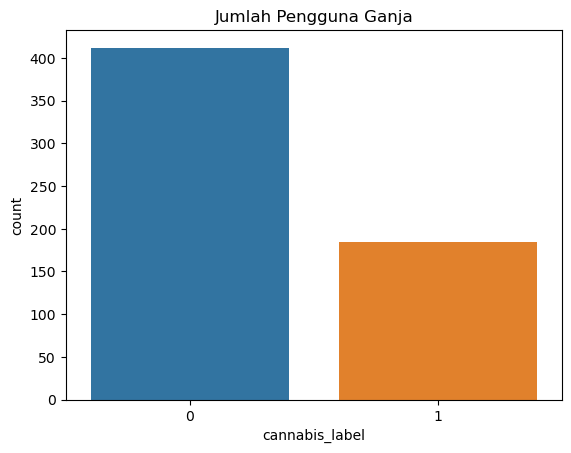

In [8]:
sns.countplot(data=df, x='cannabis_label')
plt.title("Jumlah Pengguna Ganja")
plt.show()

<h4>4. Menampilkan X dan y yang Digunakan</h4>
<p>Memisahkan dan menampilkan fitur-fitur serta data yang akan digunakan sebagai X serta data-data yang ingin diklasifikasikan.</p>

In [9]:
X = df.drop(['cannabis_label'],axis=1)
y = df['cannabis_label']
display(X)
display(y)

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,age_label,gender_label
0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,5,0
1,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,2,1
2,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,2,0
3,-0.79151,0.80523,-0.01928,0.94156,3.46436,-0.71126,-0.84637,4,0
4,-0.92104,1.45421,0.44585,-0.60633,1.63088,1.29221,0.76540,4,0
...,...,...,...,...,...,...,...,...,...
592,-1.05308,0.96248,1.88511,1.81866,1.30612,-0.71126,0.07987,1,0
593,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,1.29221,1.22470,0,1
594,1.49158,-1.92173,-0.58331,-1.77200,0.58489,-0.21712,1.22470,0,1
595,-0.05188,-1.76250,0.88309,-0.76096,2.33337,-0.71126,-0.21575,0,1


0      0
1      0
2      0
3      0
4      0
      ..
592    1
593    1
594    1
595    1
596    1
Name: cannabis_label, Length: 597, dtype: int32

<h4>5. Visualisasi Sebaran Data</h4>
<p>Untuk melakukan visualisasi sebaran data dalam bentuk 2 dimensi, kita perlu melakukan reduksi dimensi (dalam hal ini kami menggunakan PCA). Melalui visualisasi ini, kita dapat melihat sebaran data dan pola-pola yang ada pada data yang kita miliki. Berdasarkan visualisasi yang dilakukan, dapat terlihat bahwa data cukup menyampur. Namun, dapat dilihat bahwa sebagian besar kategori orang yang belum pernah menggunakan ganja berada di sisi kanan dan orang yang menggunakan ganja dalam 1 minggu terakhir barada di sisi kiri.</p>

C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\3938383392.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))


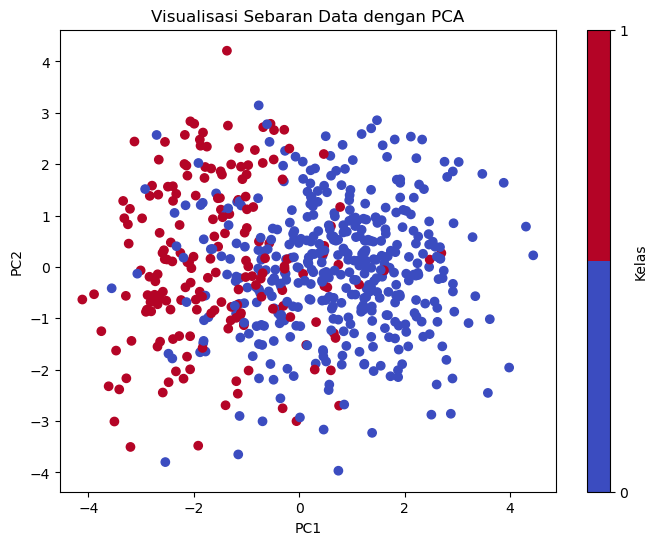

In [10]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot data dengan warna berdasarkan kelas
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.colorbar(ticks=[0, 1], label='Kelas')
plt.title('Visualisasi Sebaran Data dengan PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<h2>Model Tuning</h2>

<h3>Split Training and Test Set</h3>
<p>Membagi data ke dalam training set dan test set dengan perbandingan 7:3</p>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h3>Comparison Table untuk Mencari Model Terbaik</h3>
<p>Comparison table berisi jenis model yang digunakan, metriks penilaian seperti accuracy, precision, recall, dan f1-score, serta parameter terbaik yang dapat digunakan untuk sebuah model.</p>

In [12]:
training_comparison_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Best Parameter"])
test_comparison_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
pd.set_option('display.max_colwidth', None) #set agar semua data terlihat

<h3>Fungsi Training Model dengan Grid Search dan Stratified K-Fold Cross Validation.</h3>
<p>Dalam fungsi ini, kami menggunakan cross_val_score untuk mengisi metrix penilaian pada comparison table untuk data training</p>

In [13]:
def search_model(X, y, pipeline, model_name, hyper_parameter, training_comparison_table):
    grid_search = GridSearchCV(pipeline, hyper_parameter, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_

    accuracy = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean()
    precision = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5), scoring='precision').mean()
    recall = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5), scoring='recall').mean()
    f1 = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5), scoring='f1').mean()
    best_param = grid_search.best_params_

    metrix = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Best Parameter": best_param 
    }

    training_comparison_table = pd.concat([training_comparison_table, pd.DataFrame([metrix])], ignore_index=True)

    return best_model, training_comparison_table

<h3>Fungsi Memasukkan Metrix Penilaian Berdasarkan Test Set</h3>
<p>Dalam fungsi ini, kami menggunakan mengisi metrix penilaian pada comparison table untuk test set</p>

In [14]:
def set_test_comparison_table(y_test, y_pred, model_name, test_comparison_table):
    accuracy = accuracy_score(y_test, y_pred)
    precision = (precision_score(y_test, y_pred, pos_label=0) + precision_score(y_test, y_pred, pos_label=1))/2
    recall = (recall_score(y_test, y_pred, pos_label=0) + recall_score(y_test, y_pred, pos_label=1))/2
    f1 = (f1_score(y_test, y_pred, pos_label=0) + f1_score(y_test, y_pred, pos_label=1))/2

    test_metrix = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
        }

    test_comparison_table = pd.concat([test_comparison_table, pd.DataFrame([test_metrix])], ignore_index=True)

    return test_comparison_table

<h3>Pelatihan Model</h3>
<p>Pada pelatihan model ini, kami menggunakan 10 jenis model untuk pelatihan, yaitu Logistic Regression, KNN, SVM, MLP, Random Forest, Gaussian Naive Bayes, Adaboost, XGBoost, Gradient Boosting, dan Decision Tree. Pelatihan model ini menggunakan pipeline dengan standardisasi sebagai feature scaling untuk beberapa model. Selain itu, kita perlu menentukan hyper-parameter terbaik yang akan digunakan.</p>

<h4>1. Logistic Regression</h4>
<p>Logistic regression merupakan proses klasifikasi dengan menggunakan regresi berbentuk sigmoid yang menghasilkan output antara 0 dan 1. Dalam mencari model terbaik untuk logistic regression, kami menggunakan hyper-parameter <b>C</b>. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model adalah sebesar <b>85.608%</b> dengan <b>C = 1</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sebesar <b>86.67% </b>. Kelebihan model ini adalah dapat membagi model menjadi 2 bagian sesuai dengan sebagian besar sebaran data: kiri dan kanan</p>

In [15]:
logreg_pipeline = Pipeline([
    ('transformer', StandardScaler()),
    ('model', LogisticRegression(solver='lbfgs'))
])

logreg_hyper_parameter = {
    "model__C": list(range(1,100))
}

logreg_best_model, training_comparison_table = search_model(X_train, y_train, logreg_pipeline, "Logistic Regression", logreg_hyper_parameter, training_comparison_table)
y_pred = logreg_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Logistic Regression", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[114   7]
 [ 17  42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       121
           1       0.86      0.71      0.78        59

    accuracy                           0.87       180
   macro avg       0.86      0.83      0.84       180
weighted avg       0.87      0.87      0.86       180



C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\1930236394.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  training_comparison_table = pd.concat([training_comparison_table, pd.DataFrame([metrix])], ignore_index=True)
C:\Users\Nathan\AppData\Local\Temp\ipykernel_25140\2033298848.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_comparison_table = pd.concat([test_comparison_table, pd.DataFrame([test_metrix])], ignore_index=True)


,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.84127


<h4>2. K-Nearest Neighbours (KNN)</h4>
<p>KNN merupakan salah satu metode yang dapat digunakan untuk klasifikasi dengan mempertimbangkan kedekatan antara satu data dengan data lainnya. Jika data-data yang ada lebih dekat satu sama lain dibandingkan data lain, maka data-data tersebut akan dianggap 1 kelompok. Dalam mencari model terbaik untuk KNN, kami menggunakan hyper-parameter <b>n_neighbor (ketetanggaannya)</b>. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model adalah sebesar <b>84.89%</b> dengan <b>n_neighbors = 20</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sebesar <b>87.22%</b>. Kelebihan dari model ini adalah mudah diimplementasikan dan cukup cocok untuk data yang digunakan saat ini, karena kumpulan kategori yang ada cukup memiliki jarak yang dekat.</p>

In [16]:
knn_pipeline = Pipeline([
    ('transformer', StandardScaler()),
    ('model', KNeighborsClassifier())
])

knn_hyper_parameter = {
    "model__n_neighbors": list(range(1,100))
}

knn_best_model, training_comparison_table = search_model(X_train, y_train, knn_pipeline, "KNN", knn_hyper_parameter, training_comparison_table)
y_pred = knn_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "KNN", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[119   2]
 [ 21  38]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       121
           1       0.95      0.64      0.77        59

    accuracy                           0.87       180
   macro avg       0.90      0.81      0.84       180
weighted avg       0.88      0.87      0.86       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777


<h4>3. Support Vector Machine (SVM)</h4>
<p>SVM merupakan metode klasifikasi dengan menggunakan hyperplane (seperti pembatas dalam subspace) untuk mengelompokkan data-data yang ada. Dalam mencari model terbaik untuk SVM, kami menggunakan hyper-parameter <b>kernel</b> dan  untuk mencari kernel terbaik. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model adalah sebesar <b>86.81%</b> dengan menggunakan <b>kernel='linear'</b> dan <b>decision_function_shape='ovo'</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sebesar <b>87.78%</b>. Kelebihan dari model ini adalah sangat cocok untuk digunakan pada data yang memiliki fitur yang banyak (dalam hal ini kami menggunakan data yang terdiri dari banyak fitur). Hal ini disebabkan karena pengelompokkan dilakukan berdasarkan subspace dari data tersebut.</p>

In [17]:
svm_pipeline = Pipeline([
    ('transformer', StandardScaler()),
    ('model', SVC())
])

svm_hyper_parameter = {
    "model__kernel": ['linear','poly','rbf'],
    "model__decision_function_shape": ['ovo','ovr']
}

svm_best_model, training_comparison_table = search_model(X_train, y_train, svm_pipeline, "SVM", svm_hyper_parameter, training_comparison_table)
y_pred = svm_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "SVM", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[113   8]
 [ 14  45]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       121
           1       0.85      0.76      0.80        59

    accuracy                           0.88       180
   macro avg       0.87      0.85      0.86       180
weighted avg       0.88      0.88      0.88       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431


<h4>4. Multilayer Perceptron (MLP) -- Belum Diajarkan Di Kelas</h4>
<p>MLP merupakan nama untuk artificial neural network untuk yang terhubung dengan beberapa neuron untuk machine learning. Setiap data akan dibawa dari input layer, kemudian diseleksi oleh tiap layer untuk dikelompokkan hingga menghasilkan output layer. Proses pembelajaran yang dilakukan adalah backpropagation untuk memprediksi model dengan penyesuaian bobot dan bias. Dalam mencari model terbaik untuk MLP, kami menggunakan 3 layer dengan hyper-parameter <b>hidden_layer_sizes</b>. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model dapat berubah-ubah tiap kali dijalankan, namun berada di sekitar <b>79.62%</b> dengan menggunakan <b>hidden_layer_sizes=(16, 8, 4)</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>78.33%</b>. Kelebihan dari model ini adalah sangat cocok untuk digunakan pada berbagai keadaan, seperti regresi, klasifikasi, dan sebagainya. Selain itu, model ini juga baik digunakan untuk data yang memiliki banyak fitur.</p>

In [18]:
mlp_pipeline = Pipeline([
    ('transformer', StandardScaler()),
    ('model', MLPClassifier(solver='lbfgs'))
])

mlp_hyper_parameter = {
    "model__hidden_layer_sizes": [(16, 8, 4),(16, 16, 16),(32, 16, 8), (32, 32, 32),(64, 64, 32), (64, 64, 64),(128, 64, 32),(128, 128, 128)]
}

mlp_best_model, training_comparison_table = search_model(X_train, y_train, mlp_pipeline, "MLP 3 Layer", mlp_hyper_parameter, training_comparison_table)
y_pred = mlp_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "MLP 3 Layer", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

C:\anaconda\envs\IBDA2032_Kecerdasan_Buatan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anaconda\envs\IBDA2032_Kecerdasan_Buatan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anaconda\envs\IBDA2032_Kecerdasan_Buatan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lb

Confusion Matrix: 
[[107  14]
 [ 25  34]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       121
           1       0.71      0.58      0.64        59

    accuracy                           0.78       180
   macro avg       0.76      0.73      0.74       180
weighted avg       0.78      0.78      0.78       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682


<h4>5. Random Forest -- Ensemble Learning</h4>
<p>Random Forest merupakan cara untuk mengklasifikasikan data melalui banyak decision trees. Random forest mencari fitur terbaik dari sebagian subset yang dipilih secara random. Dalam mencari model terbaik untuk Random Forest, kami menggunakan hyper-parameter <b>n_estimator</b> untuk menentukan kedalaman pencarian yang terbaik dan <b>criterion</b> untuk mencari penentu terbaik. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>84.64%</b> dengan menggunakan <b>criterion='gini'</b> dan <b>n_estimator = 29</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>86.67%</b>. Kelebihan dari model ini adalah dapat meminimalkan overfitting dari tree dan dapat mengelompokkan fitur yang penting tanpa harus dilakukan standardisasi terlebih dahulu.</p>

In [19]:
random_forest_pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

random_forest_hyper_parameter = {
    "model__n_estimators" : list(range(2,50)),
    "model__criterion" : ['gini','entropy']
}

random_forest_best_model, training_comparison_table = search_model(X_train, y_train, random_forest_pipeline, "Random Forest", random_forest_hyper_parameter, training_comparison_table)
y_pred = random_forest_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Random Forest", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[114   7]
 [ 17  42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       121
           1       0.86      0.71      0.78        59

    accuracy                           0.87       180
   macro avg       0.86      0.83      0.84       180
weighted avg       0.87      0.87      0.86       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270


<h4>6. Gaussian Naive Bayes</h4>
<p>Gaussian Naive Bayes merupakan salah satu cara untuk mengklasifikasikan data-data yang kita miliki berdasarkan probabilitas dan rataan serta standar deviasi dari kelas tertentu. Dalam mencari model terbaik untuk Gaussian Naive Bayes, kami tidak mencari hyper-parameter terbaik menggunakan grid search. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>82.73%</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>87.22%</b>. Kelebihan dari model ini adalah lebih cepat dalam melakukan pelatihan model, dapat menghitung kontribusi tiap fitur, dan dapat menggunakan jumlah training data yang lebih sedikit. Untuk data kontinu dan memiliki jumlah fitur yang banyak (seperti data yang sedang digunakan), biasanya menggunakan Gaussian.</p>

In [20]:
nb_pipeline = Pipeline([
    ('transformer', StandardScaler()),
    ('model', GaussianNB())
])

nb_hyper_parameter = {
}

nb_best_model, training_comparison_table = search_model(X_train, y_train, nb_pipeline, "Gaussian Naive Bayes", nb_hyper_parameter, training_comparison_table)
y_pred = nb_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Gaussian Naive Bayes", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[113   8]
 [ 15  44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       121
           1       0.85      0.75      0.79        59

    accuracy                           0.87       180
   macro avg       0.86      0.84      0.85       180
weighted avg       0.87      0.87      0.87       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212


<h4>7. Adaptive Boosting (Adaboost)</h4>
<p>Adaboost merupakan salah satu cara untuk mengklasifikasikan data-data yang kita miliki dengan memperbaiki model dari yang awalnya underfitting menjadi model terbaik. Dalam mencari model terbaik untuk Adaboost, kami menggunakan hyper-parameter <b>n_estimators</b> untuk mencari berapa kali model harus melakukan estimasi dan <b>learning_rate</b> untuk menentukan kecepatan pembelajaran. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>83.20%</b> dengan menggunakan <b>learning_rate=0.1</b> dan <b>n_estimators=48</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>87.78%</b>. Kelebihan dari model ini adalah dapat memperbaiki kualitas model dari waktu ke waktu dan dapat semakin berfokus kepada kasus yang sulit.</p>

In [21]:
adaboost_pipeline = Pipeline([
    ('model', AdaBoostClassifier())
])

adaboost_hyper_parameter = {
    "model__n_estimators" : list(range(30,60)),
    "model__learning_rate" : [0.01, 0.1, 1, 10]
}

adaboost_best_model, training_comparison_table = search_model(X_train, y_train, adaboost_pipeline, "Adaboost", adaboost_hyper_parameter, training_comparison_table)
y_pred = adaboost_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Adaboost", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[119   2]
 [ 20  39]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       121
           1       0.95      0.66      0.78        59

    accuracy                           0.88       180
   macro avg       0.90      0.82      0.85       180
weighted avg       0.89      0.88      0.87       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}
6,Adaboost,0.832042,0.790657,0.601846,0.677942,"{'model__learning_rate': 0.1, 'model__n_estimators': 48}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212
6,Adaboost,0.877778,0.903667,0.822244,0.847692


<h4>8. Extreme Gradient Boosting (XGBoost)</h4>
<p>XGBoost merupakan salah satu cara untuk mengklasifikasikan data-data yang kita miliki dengan menggunakan lasso dan ridge untuk mencegah overfitting, memanfaatkan komputasi paralel sehingga lebih cepat, dapat menangani nilai yang hilang, dan dapat menghapus cabang pohon yang tidak signifikan. Dalam mencari model terbaik untuk XGBoost, kami tidak mencari hyper-parameter terbaik. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>84.4%</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>86.11%</b>. Kelebihan dari model ini adalah dapat melakukan komputasi secara paralel dan menghapus cabang pohon yang tidak signifikan sehingga lebih cepat. Hal tersebut dapat mempercepat proses klasifikasi data kami yang memiliki banyak fitur.</p>

In [22]:
xgboost_pipeline = Pipeline([
    ('model', XGBClassifier())
])

xgboost_hyper_parameter = {}

xgboost_best_model, training_comparison_table = search_model(X_train, y_train, xgboost_pipeline, "XGBoost", xgboost_hyper_parameter, training_comparison_table)
y_pred = xgboost_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "XGBoost", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[112   9]
 [ 16  43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.83      0.73      0.77        59

    accuracy                           0.86       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.86      0.86      0.86       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}
6,Adaboost,0.832042,0.790657,0.601846,0.677942,"{'model__learning_rate': 0.1, 'model__n_estimators': 48}"
7,XGBoost,0.844033,0.777893,0.690154,0.729759,{}


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212
6,Adaboost,0.877778,0.903667,0.822244,0.847692
7,XGBoost,0.861111,0.850962,0.827217,0.837187


<h4>9. Gradient Boosting</h4>
<p>Gradient Boosting merupakan salah satu cara untuk mengklasifikasikan data-data yang kita miliki dengan melakukan fit model yang baru ke residual error yang dihasilkan model sebelumnya. Dalam mencari model terbaik untuk Gradient Boosting, kami menggunakan hyper-parameter <b>n_estimators</b> untuk mencari berapa kali model harus melakukan estimasi dan <b>max_depth</b> untuk menentukan batas kedalaman pohon. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>83.44%</b> dengan menggunakan <b>n_estimators=100</b> dan <b>max_depth=4</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>86.67%</b>. Kelebihan dari model ini adalah dapat digunakan pada data yang beragam dan tidak teratur serta menangani data dengan banyak fitur dengan baik.</p>

In [23]:
gboost_pipeline = Pipeline([
    ('model', GradientBoostingClassifier())
])

gboost_hyper_parameter = {
    "model__n_estimators":[1,5,10,20,40,100],
    "model__max_depth":list(range(3,6))
}

gboost_best_model, training_comparison_table = search_model(X_train, y_train, gboost_pipeline, "Gradient Boosting", gboost_hyper_parameter, training_comparison_table)
y_pred = gboost_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Gradient Boosting", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[112   9]
 [ 15  44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.83      0.75      0.79        59

    accuracy                           0.87       180
   macro avg       0.86      0.84      0.84       180
weighted avg       0.86      0.87      0.86       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}
6,Adaboost,0.832042,0.790657,0.601846,0.677942,"{'model__learning_rate': 0.1, 'model__n_estimators': 48}"
7,XGBoost,0.844033,0.777893,0.690154,0.729759,{}
8,Gradient Boosting,0.834366,0.740522,0.705538,0.731258,"{'model__max_depth': 4, 'model__n_estimators': 100}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212
6,Adaboost,0.877778,0.903667,0.822244,0.847692
7,XGBoost,0.861111,0.850962,0.827217,0.837187
8,Gradient Boosting,0.866667,0.856039,0.835691,0.844470


<h4>10. Decision Tree</h4>
<p>Decision Tree merupakan salah satu cara untuk mengklasifikasikan data-data yang kita miliki dengan menggunakan pertanyaan if/else secara hierarki. Dalam mencari model terbaik untuk Decision Tree, kami menggunakan hyper-parameter <b>criterion</b> untuk menentukan kriteria apa yang paling sesuai dan <b>max_depth</b> untuk menentukan batas kedalaman pohon. Berdasarkan data training, akurasi rata-rata yang didapatkan oleh model berada di sekitar <b>80.08%</b> dengan menggunakan <b>criterion='entropy'</b> dan <b>max_depth=4</b>. Setelah dilakukan pengujian terhadap test set, akurasi yang dihasilkan adalah sekitar <b>86.11%</b>. Kelebihan dari model ini adalah tidak perlu melakukan feature scaling dan mengklasifikasikan berdasarkan fitur-fitur yang paling penting.</p>

In [24]:
tree_pipeline = Pipeline([
    ('model', DecisionTreeClassifier(random_state=0))
])

tree_hyper_parameter = {
    "model__criterion":['gini', 'entropy'],
    "model__max_depth":list(range(1,20))
}

tree_best_model, training_comparison_table = search_model(X_train, y_train, tree_pipeline, "Decision Tree", tree_hyper_parameter, training_comparison_table)
y_pred = tree_best_model.predict(X_test)

test_comparison_table = set_test_comparison_table(y_test, y_pred, "Decision Tree", test_comparison_table)

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
display(training_comparison_table)
display(test_comparison_table)

Confusion Matrix: 
[[114   7]
 [ 18  41]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       121
           1       0.85      0.69      0.77        59

    accuracy                           0.86       180
   macro avg       0.86      0.82      0.83       180
weighted avg       0.86      0.86      0.86       180



,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}
6,Adaboost,0.832042,0.790657,0.601846,0.677942,"{'model__learning_rate': 0.1, 'model__n_estimators': 48}"
7,XGBoost,0.844033,0.777893,0.690154,0.729759,{}
8,Gradient Boosting,0.834366,0.740522,0.705538,0.731258,"{'model__max_depth': 4, 'model__n_estimators': 100}"
9,Decision Tree,0.800803,0.704767,0.571692,0.629583,"{'model__criterion': 'entropy', 'model__max_depth': 4}"


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212
6,Adaboost,0.877778,0.903667,0.822244,0.847692
7,XGBoost,0.861111,0.850962,0.827217,0.837187
8,Gradient Boosting,0.866667,0.856039,0.835691,0.844470
9,Decision Tree,0.861111,0.858902,0.818532,0.833770


<h2>Pengukuran Kerja / Evaluasi Model</h2>

<h3>1. Analisis Accuracy, Precision, Recall, dan F1-Score</h3>

In [25]:
display(training_comparison_table)

,Model,Accuracy,Precision,Recall,F1-score,Best Parameter
0,Logistic Regression,0.856081,0.773636,0.737231,0.752421,{'model__C': 1}
1,KNN,0.848939,0.796139,0.674154,0.728102,{'model__n_neighbors': 20}
2,SVM,0.868130,0.796337,0.761231,0.776437,"{'model__decision_function_shape': 'ovo', 'model__kernel': 'linear'}"
3,MLP 3 Layer,0.796213,0.669294,0.650154,0.680073,"{'model__hidden_layer_sizes': (16, 8, 4)}"
4,Random Forest,0.846443,0.773474,0.697538,0.732342,"{'model__criterion': 'gini', 'model__n_estimators': 29}"
5,Gaussian Naive Bayes,0.827281,0.700425,0.745538,0.721825,{}
6,Adaboost,0.832042,0.790657,0.601846,0.677942,"{'model__learning_rate': 0.1, 'model__n_estimators': 48}"
7,XGBoost,0.844033,0.777893,0.690154,0.729759,{}
8,Gradient Boosting,0.834366,0.740522,0.705538,0.731258,"{'model__max_depth': 4, 'model__n_estimators': 100}"
9,Decision Tree,0.800803,0.704767,0.571692,0.629583,"{'model__criterion': 'entropy', 'model__max_depth': 4}"


In [26]:
display(test_comparison_table)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.866667,0.863686,0.827007,0.841270
1,KNN,0.872222,0.900000,0.813769,0.839777
2,SVM,0.877778,0.869410,0.848298,0.857431
3,MLP 3 Layer,0.783333,0.759470,0.730284,0.740682
4,Random Forest,0.866667,0.863686,0.827007,0.841270
5,Gaussian Naive Bayes,0.872222,0.864483,0.839824,0.850212
6,Adaboost,0.877778,0.903667,0.822244,0.847692
7,XGBoost,0.861111,0.850962,0.827217,0.837187
8,Gradient Boosting,0.866667,0.856039,0.835691,0.844470
9,Decision Tree,0.861111,0.858902,0.818532,0.833770


<p>Berdasarkan analisis akurasi, keseluruhan model memiliki jangkauan akurasi dari 79% hingga 87% untuk training set dan 78% hingga 88% untuk test set. Dalam hal ini, kita akan lebih fokus untuk akurasi yang diberikan berdasarkan Stratified K-folds Cross Validation pada training set.
Model terbaik yang dapat digunakan untuk data ini adalah model SVM Linear dengan akurasi paling tinggi, yaitu sebesar 86.81% untuk training dan 87.78% untuk test set. Presisi, recall, dan f1-score terbaik juga diberikan oleh model SVM Linear dengan persentase sebesar 79.64%, 76.12%, dan 77.64% secara berturut-turut. Di sisi lain, model yang kurang optimal untuk digunakan pada jenis data ini adalah MLP dengan 3 layer yang memiliki akurasi sekitar 79% dan presisi terendah, yaitu sekitar 66.93%. Sementara untuk recall dan f1-score terendah terdapat pada model Decision Tree dengan persentase sebesar 57.17% dan 62.96% secara berturut-turut. Model latih lainnya memberikan akurasi yang cukup baik dengan kisaran 80% hingga 85%.</p>

<h3>2. Analisis Fitur Terpenting</h3>
<p>Analisis fitur terpenting ini dapat memberikan gambaran bagi kita mengenai ciri utama yang dapat dinilai dari seorang pengguna narkoba jenis ganja. Dalam pencarian fitur terpenting ini, kami menggunakan XGBoost sebagai penilaian fitur-fitur tersebut.</p>

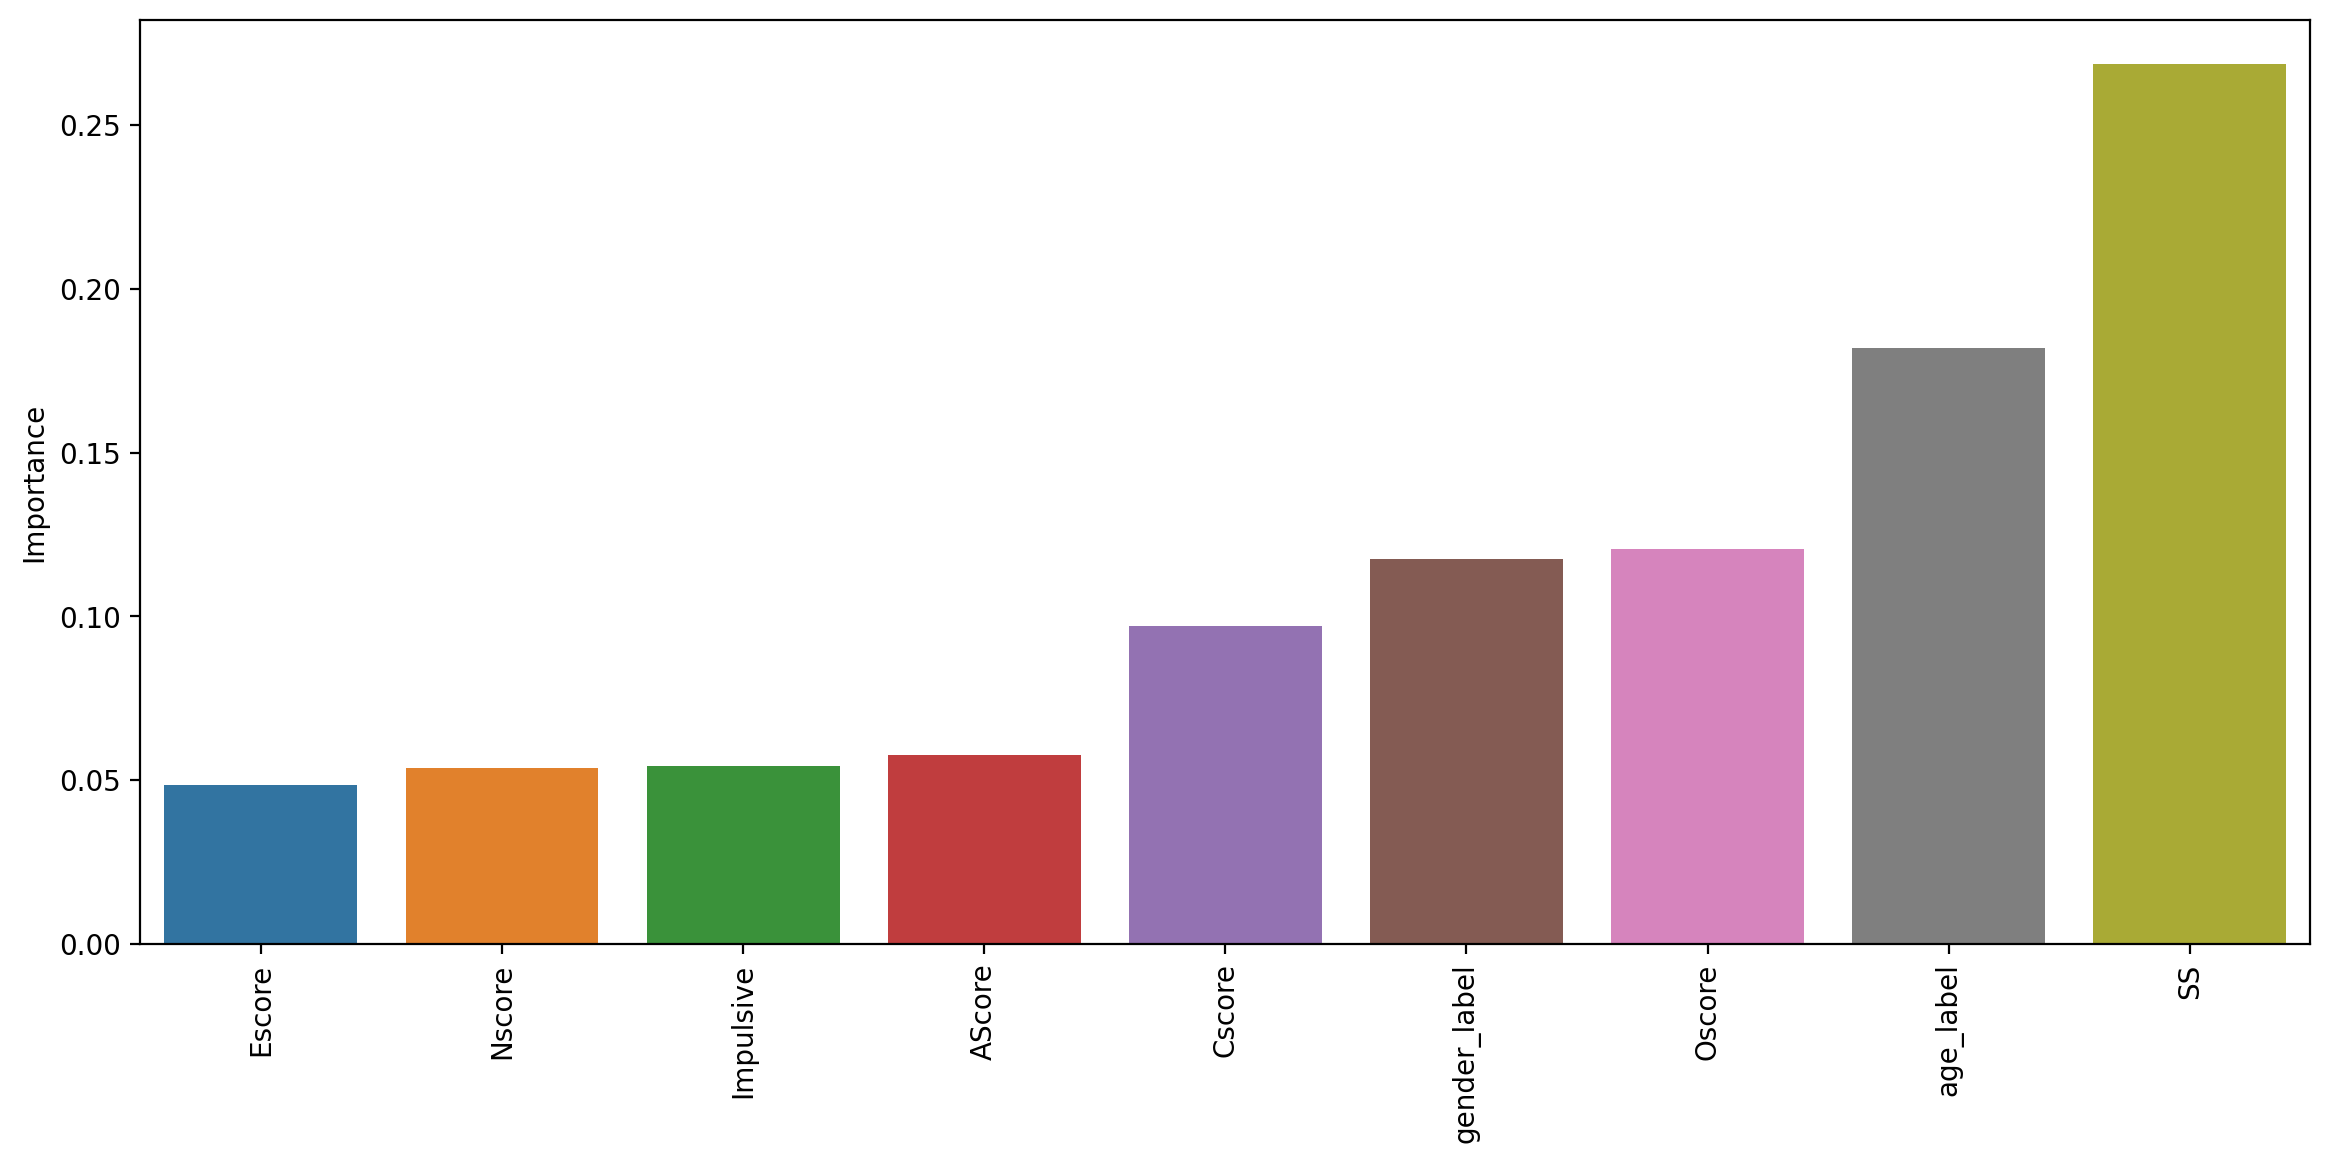

In [27]:
feat_import = xgboost_best_model.named_steps['model'].feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
plt.show()

<p>Berdasarkan grafik di atas, dapat dilihat bahwa faktor paling utama yang dapat kita lihat untuk mengklasifikasikan pengguna narkoba jenis ganja selama 1 minggu terakhir dan yang tidak pernah menggunakan narkoba jenis ganja adalah SS (Sensation Seeking), yaitu orang yang ingin terus mencari sensasi dan pengalaman baru. Faktor kedua yang menjadi penentu adalah usia orang-orang tersebut. Sedangkan faktor yang paling
kurang menentukan adalah Escore (Extraversion) yang mengacu pada sifat sosial sesorang.</p>

<h2>Visualisasi Hasil</h2>
<p>Visualisasi Hasil yang kami gunakan adalah berupa scatter plot. Kami menggunakan PCA untuk mengurangi dimensi dataset hingga 2 dimensi sehingga dapat divisualisasikan dengan baik. Kami membagi visualisasi hasil ini menjadi 2 bagian: Visualisasi hasil training dan visualisasi hasil test.</p>

In [28]:
# Membuat list yang berisikan semua model dan semua nama model
all_model = [logreg_best_model, knn_best_model, svm_best_model, mlp_best_model, random_forest_best_model, 
             nb_best_model, adaboost_best_model, xgboost_best_model, gboost_best_model, tree_best_model]

models_name = ["Logistic Regression", "KNN", "Linear SVM", "MLP 3 Hidden Layers", "Random Forest",
               "Gaussian Naive Bayes", "Adaboost", "XGBoost","Gradient Boosting", "Decision Tree"]

<h3>Visualisasi Hasil Training</h3>
<p>Visualisasi ini memberikan gambaran kepada kita seberapa akurat model yang kita latih jika dibandingkan dengan data latih. Dari visualisasi ini, dapat dilihat bahwa setiap model memiliki cara yang bervariasi dalam mengklasifikasikan data. Dari hasil visualisasi juga kita dapat melihat model mana yang terbaik (dalam hal ini beberapa model dapat kita lihat cukup baik, seperti SVM, KNN, Logistic Regression, dll.).</p>

C:\anaconda\envs\IBDA2032_Kecerdasan_Buatan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


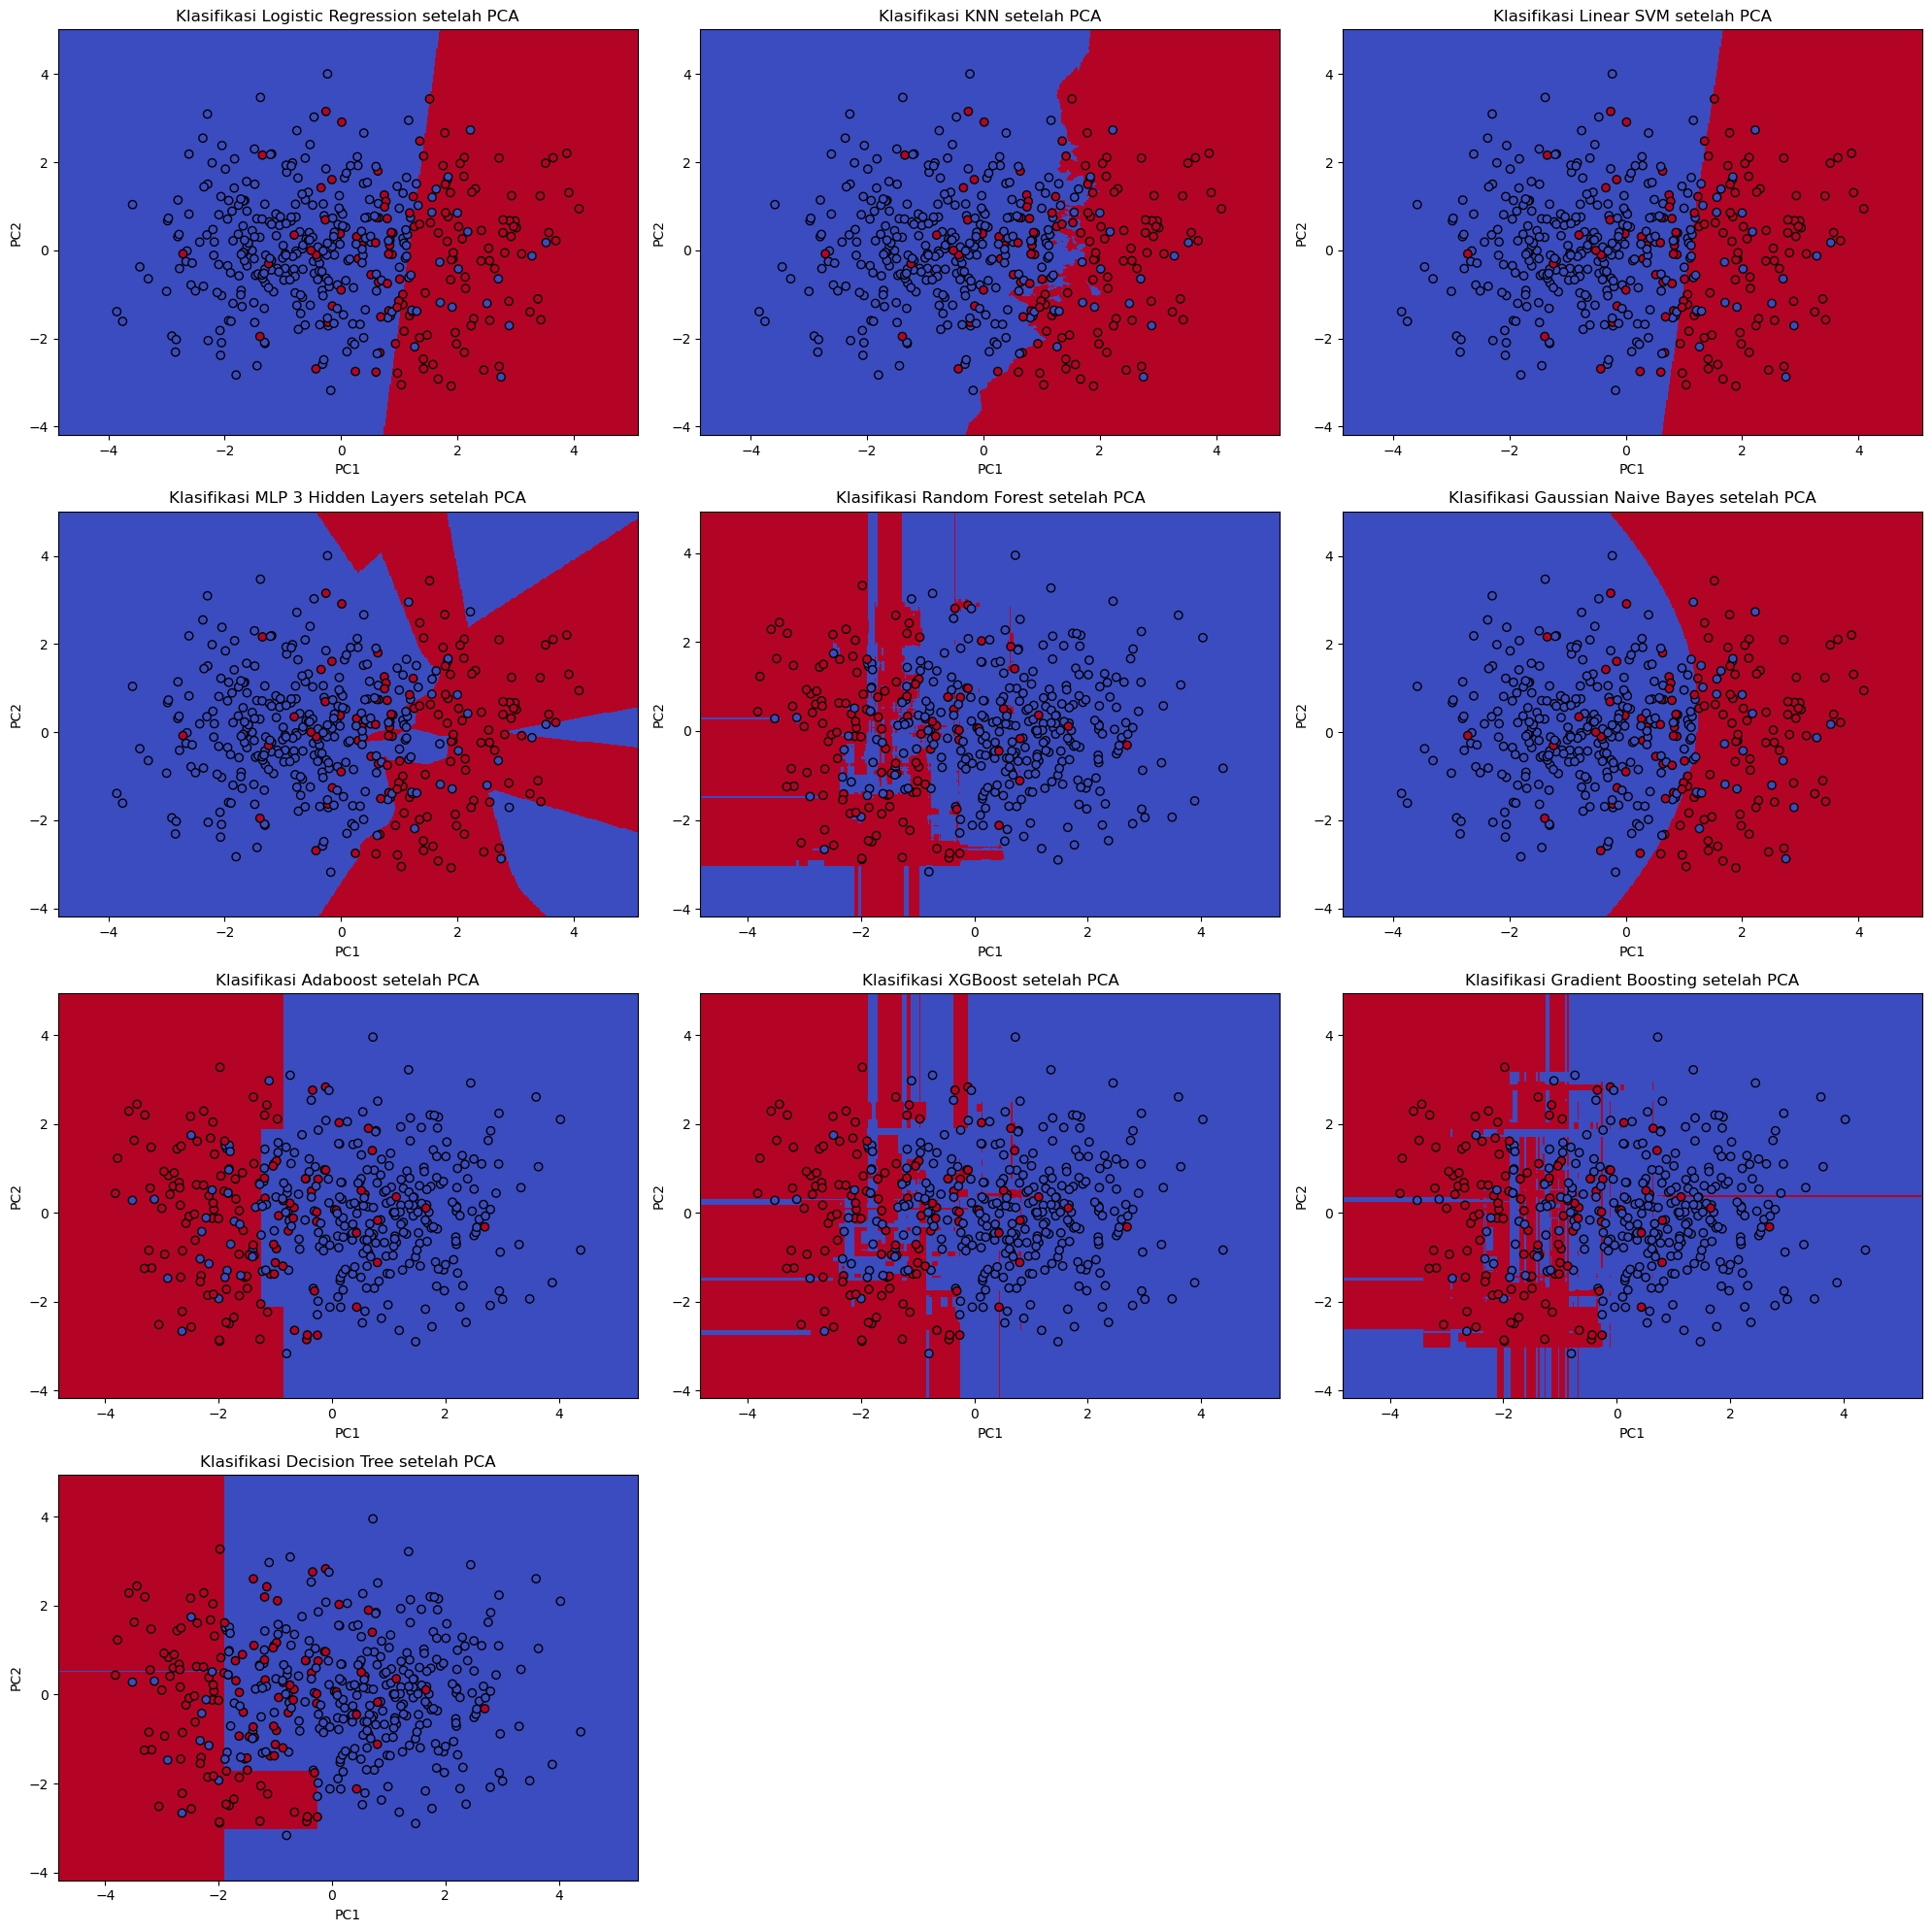

In [29]:
# Membuat PCA dan mengurangi dimensi data
pca = PCA(n_components=2)

# Mendefinisikan jumlah model dan menghitung jumlah baris dan kolom subplot
num_models = len(all_model)
num_rows = 4
num_cols = -(-num_models // num_rows)  # Pembagian yang dibulatkan ke atas

# Membuat sebuah figure untuk semua plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Melakukan iterasi untuk setiap model dan subplot yang sesuai
for i, model in enumerate(all_model):
    # Menentukan model harus menggunakan standardization atau tidak (ensemble dan decision tree tidak perlu)
    if i == 4 or i >=6:
        X_reduced = pca.fit_transform(X_train)
    else:
        scaler = StandardScaler()
        scaled_X_train = scaler.fit_transform(X_train)
        X_reduced = pca.fit_transform(scaled_X_train)

    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    # Melatih model
    model.fit(X_reduced, y_train)

    # Membuat grid untuk memetakan daerah keputusan
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Memetakan daerah keputusan
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Memvisualisasikan data dan daerah keputusan
    ax.pcolormesh(xx, yy, Z, cmap='coolwarm')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, edgecolors='black', cmap='coolwarm')
    ax.set_title(f'Klasifikasi {models_name[i]} setelah PCA')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

# Menghapus subplot yang tidak digunakan
for i in range(num_models, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


<h3>Visualisasi Hasil Test</h3>
<p>Visualisasi hasil test memberikan gambaran kepada kita mengenai bagaimana cara model mengklasifikasikan data uji yang akan digunakan nantinya. Dari visualisasi ini, kita dapat mengetahui seberapa akurat model kita untuk memprediksi kejadian-kejadian yang akan datang. </p>

C:\anaconda\envs\IBDA2032_Kecerdasan_Buatan\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


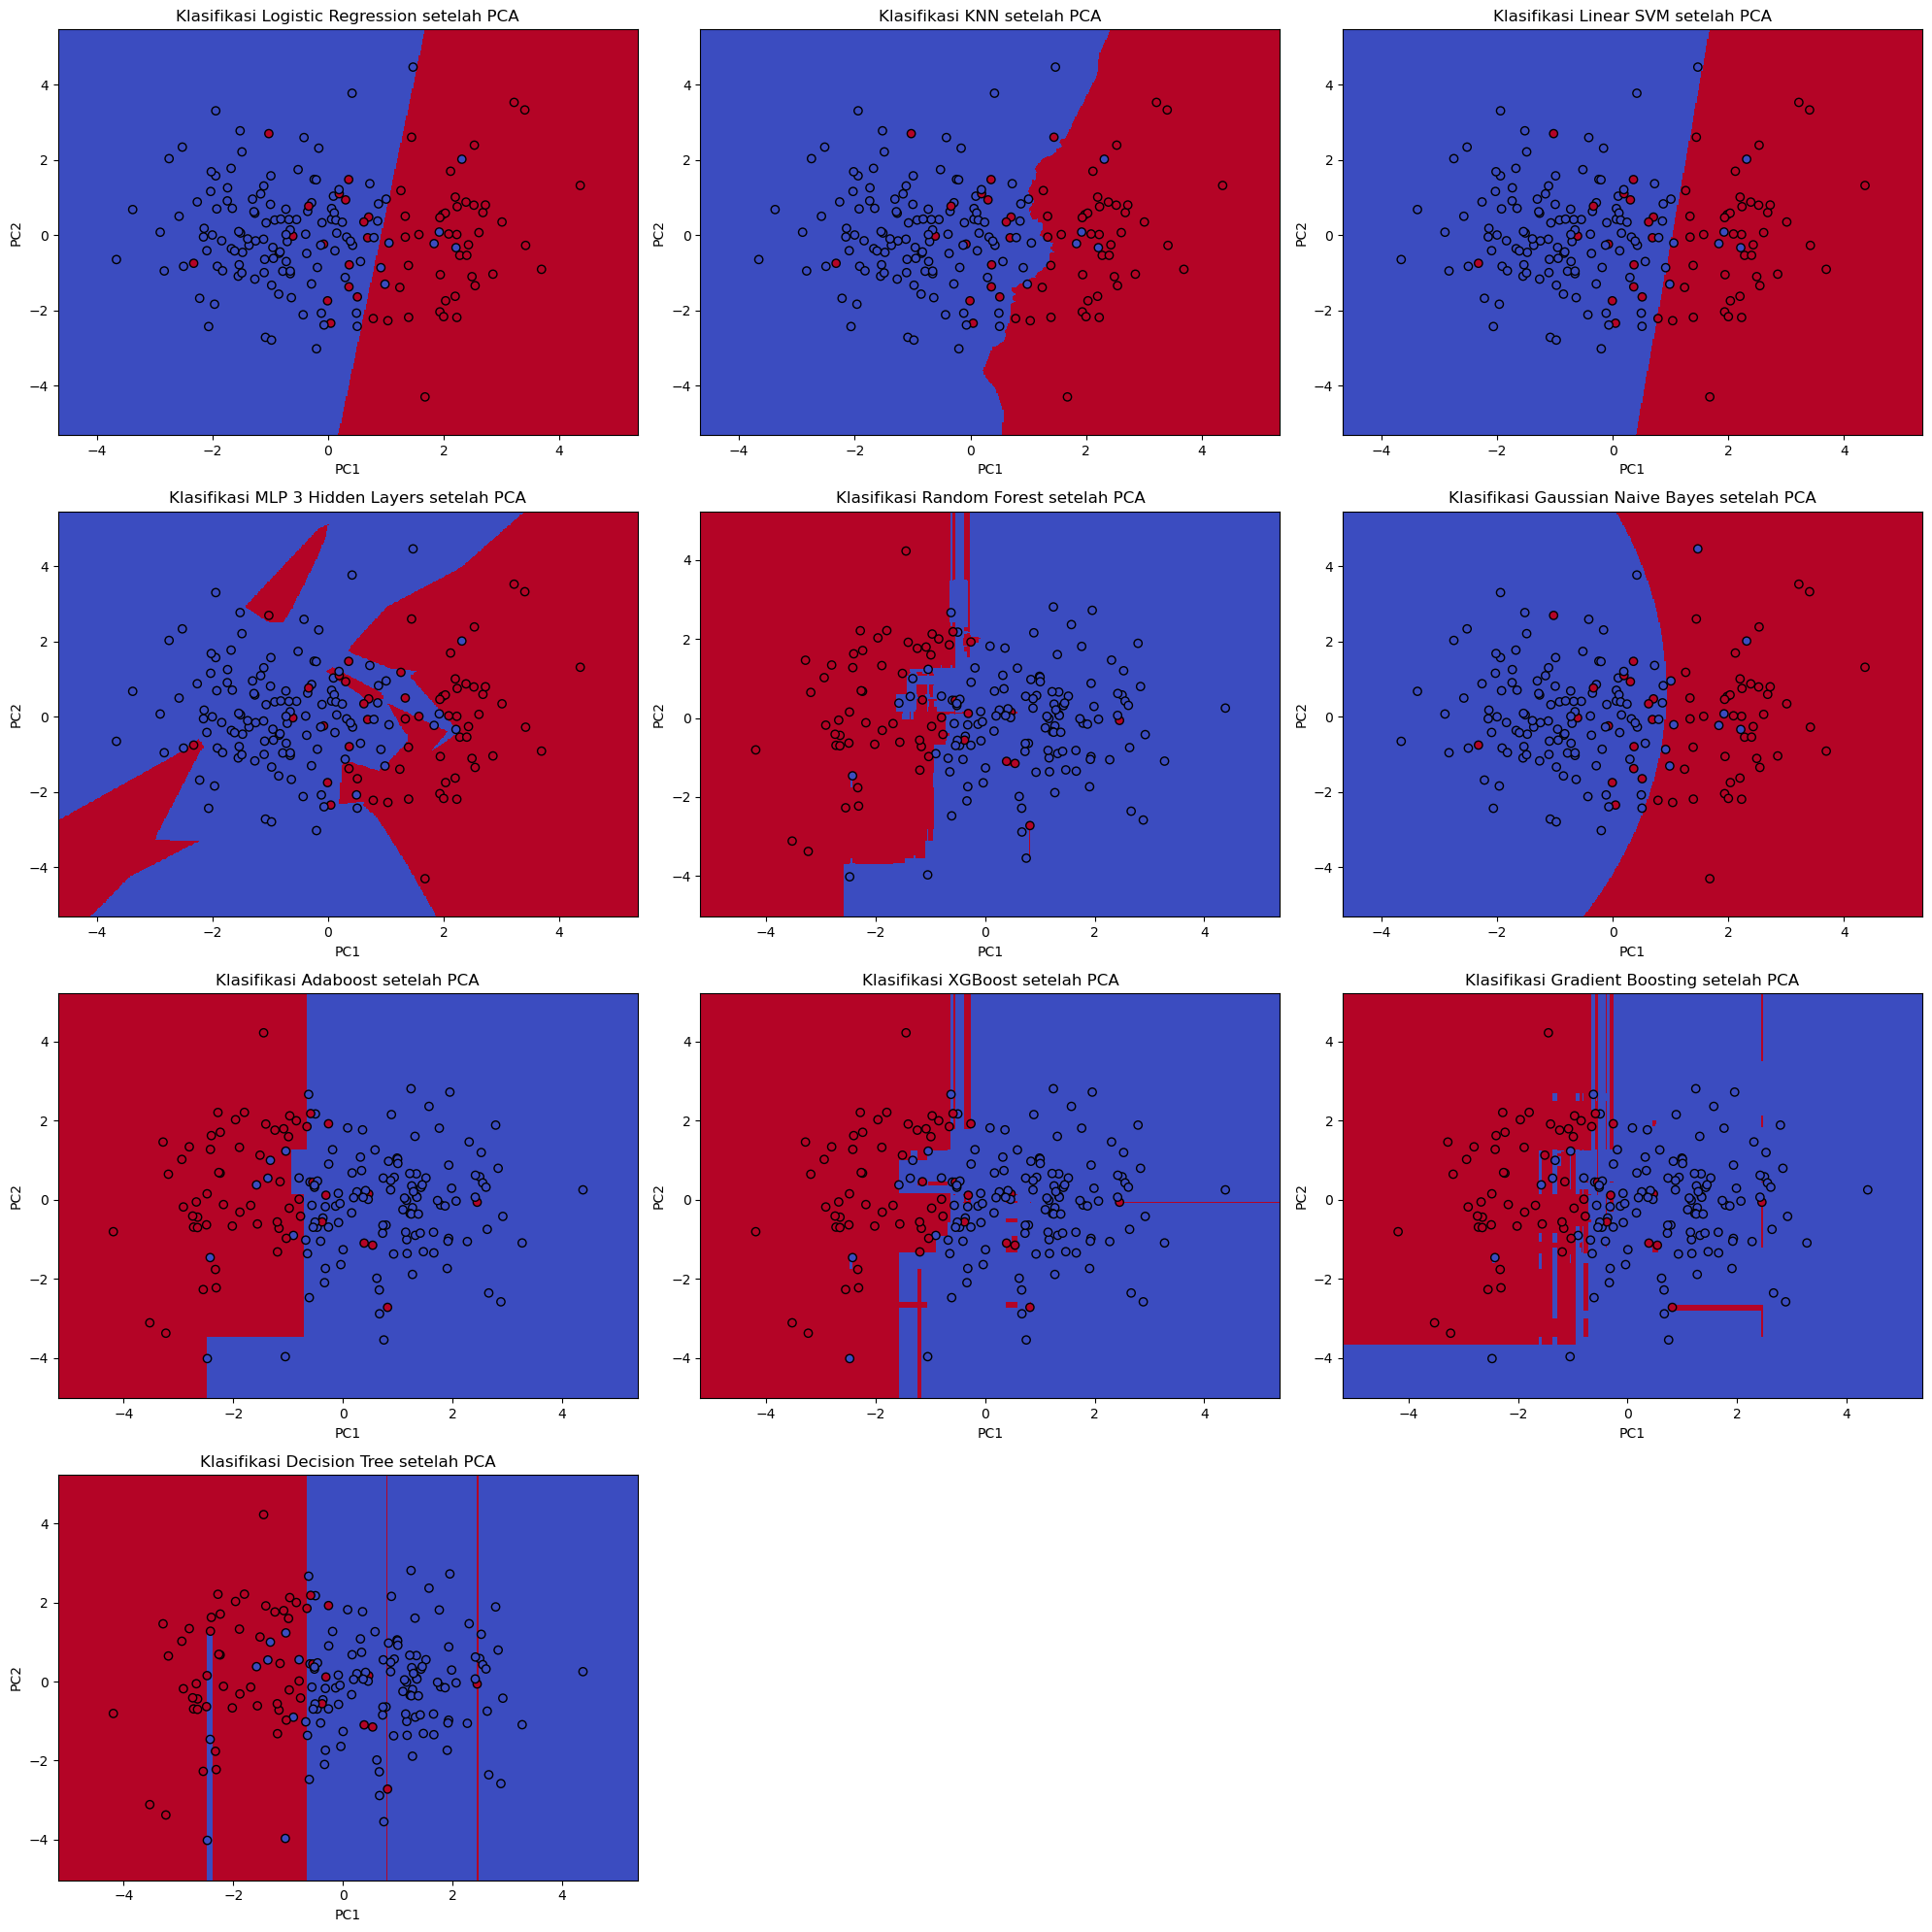

In [30]:
# Membuat PCA dan mengurangi dimensi data
pca = PCA(n_components=2)

# Mendefinisikan jumlah model dan menghitung jumlah baris dan kolom subplot
num_models = len(all_model)
num_rows = 4
num_cols = -(-num_models // num_rows)  # Pembagian yang dibulatkan ke atas

# Membuat sebuah figure untuk semua plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Melakukan iterasi untuk setiap model dan subplot yang sesuai
for i, model in enumerate(all_model):
    # Menentukan model harus menggunakan standardization atau tidak (ensemble dan decision tree tidak perlu)
    if i == 4 or i >=6:
        X_reduced = pca.fit_transform(X_test)
    else:
        scaler = StandardScaler()
        scaled_X_test = scaler.fit_transform(X_test)
        X_reduced = pca.fit_transform(scaled_X_test)
        
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    # Melatih model
    model.fit(X_reduced, y_test)

    # Membuat grid untuk memetakan daerah keputusan
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Memetakan daerah keputusan
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Memvisualisasikan data dan daerah keputusan
    ax.pcolormesh(xx, yy, Z, cmap='coolwarm')
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, edgecolors='black', cmap='coolwarm')
    ax.set_title(f'Klasifikasi {models_name[i]} setelah PCA')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

# Menghapus subplot yang tidak digunakan
for i in range(num_models, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


<p>Berdasarkan visualisasi hasil, Logistic Regression dan Linear SVM menjadi model dengan tingkat akurasi yang cukup tinggi dalam mengklasifikasikan data-data yang ada. Tampak pada hasil visualisasi tersebut, tiap model memiliki cara yang bervariasi dalam mengklasifikasikan data-data yang ada. Maka, baik tidaknya suatu model bergantung pada data yang digunakan. Dapat kita lihat bahwa MLP 3 Hidden Layer mengklasifikasikan data dengan error yang cukup banyak. Hal tersebut menandakan bahwa MLP 3 Hidden Layer tersebut kurang cocok dalam menangani kasus data ini dikarenakan data ini memiliki cukup banyak fitur dan jumlah data yang ada pada dataset ini tidak cukup banyak untuk dilakukan training yang bagus terhadap model MLP 3 layer.</p>

<h2>Kesimpulan</h2>
<p>Proyek ini bertujuan untuk mengklasifikasikan data pengguna narkoba jenis ganja dalam 1 minggu terakhir dengan orang yang tidak pernah menggunakan narkoba tersebut. Hasilnya, orang-orang yang menggunakan narkoba jenis ganja lebih dapat dideteksi dari sensation seeking (keinginan untuk mencari sensasi dan pengalaman baru) dan umur orang tersebut. Model yang paling tepat untuk mengklasifikasikan orang-orang tersebut adalah Linear SVM dengan tingkat akurasi sebesar 86.81%. Akurasi ini cukup baik untuk memprediksi, namun tidak dapat menjadi satu-satunya acuan. Hal tersebut dikarenakan masih mungkin terdapat error dalam penggunaan metode klasifikasi ini. Sedangkan untuk model yang kurang cocok untuk data yang terbatas ini adalah MLP 3 layer.</p>